https://github.com/komalck/FACIAL-EMOTION-RECOGNITION/blob/master/Facial_emotion_recognition.ipynb

In [ ]:
!pip install -q keras # Installing Keras libraries
#Keras is a great high-level library which allows anyone to create powerful machine learning models in minutes.

In [1]:
# Accesing google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np   # linear algebra
import cv2 #OpenCV is a great tool for image processing and performing computer vision tasks. 
#It is an open-source library that can be used to perform tasks like face detection, objection tracking, 
#landmark detection, and much more.

from keras.models import Sequential  # Sequential model is a linear stack of layers.
from keras.layers import Dense, Dropout, Flatten
#Dense layers are used when association can exist among any feature to any other feature in data point.
#Dropout is a way of cutting too much association among features by dropping the weights (edges) at a probability.
#Flatten layers are used when you got a multidimensional output and you want to make it linear to pass it onto a Dense layer.

from keras.layers import Conv2D
#Keras Conv2D is a 2D Convolution Layer, this layer creates a 
#convolution kernel that is wind with layers input which helps produce a tensor of outputs.

from keras.optimizers import Adam
#Optimizer that implements the Adam algorithm. Adam optimization is a 
#stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

from keras.layers import MaxPooling2D
#Max pooling operation for 2D spatial data. Downsamples the input along its spatial dimensions (height and width) 
#by taking the maximum value over an input window (of size defined by pool_size ) for each channel of the input.

from keras.preprocessing.image import ImageDataGenerator
#Keras ImageDataGenerator class provides a quick and easy way to augment your images. It provides a host of 
#different augmentation techniques like standardization, rotation, shifts, flips, brightness change, and many more.

In [ ]:
import os  #The OS module in Python provides functions for interacting with the operating system. OS comes under Python's standard utility modules. 
#This module provides a portable way of using operating system-dependent functionality
print(os.listdir('/content/drive/MyDrive/Images'))
#Python method listdir() returns a list containing the names of the entries in the directory given by path. The list is in arbitrary order. 
#It does not include the special entries '.' and '..' even if they are present in the directory.

['train', 'test']


In [ ]:
train_dir = '/content/drive/MyDrive/Images/train' # Train path
val_dir = '/content/drive/MyDrive/Images/test'    # Test path

In [ ]:
emotion_labels = sorted(os.listdir(train_dir)) # use the sorted function to sort this list.
print(emotion_labels)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
import matplotlib.pyplot as plt # to draw plots
def plot_images(img_dir, top=10): #path/to/image/folder means the training folder in the data_tracking_image
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:10]
  #os.path.join() method in Python join one or more path components intelligently
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(img_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

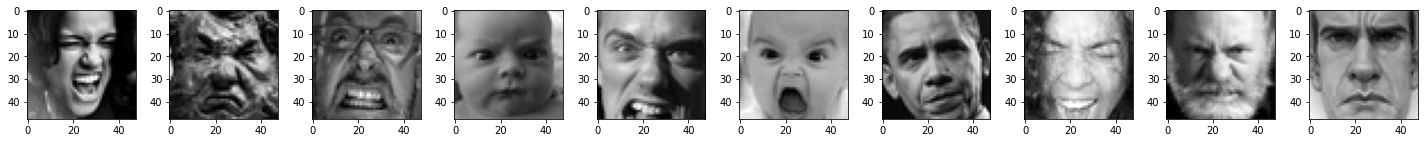

In [ ]:
plot_images(train_dir+'/angry')

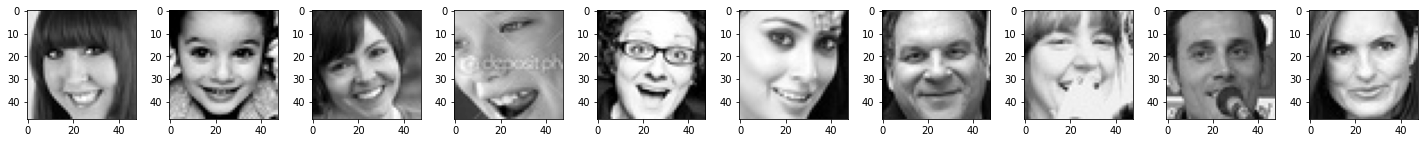

In [ ]:
plot_images(train_dir+'/happy')

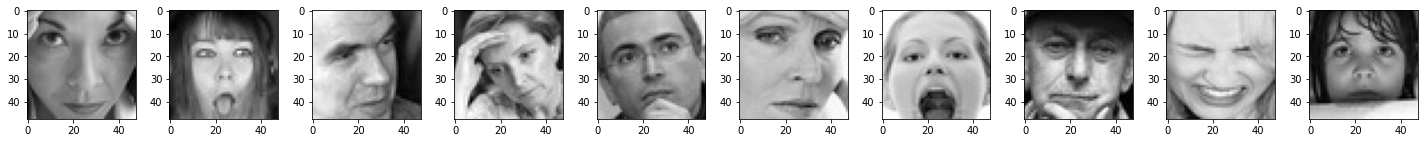

In [ ]:
plot_images(val_dir+'/fear')

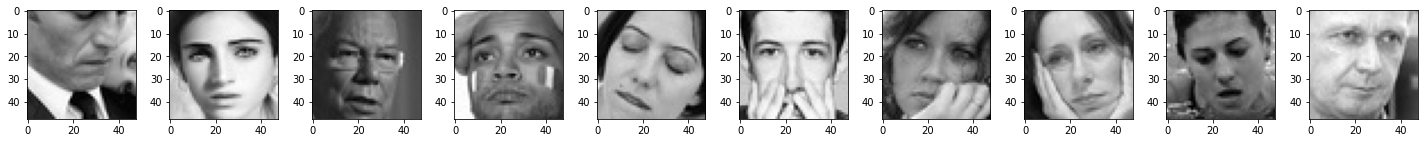

In [ ]:
plot_images(train_dir+'/sad')

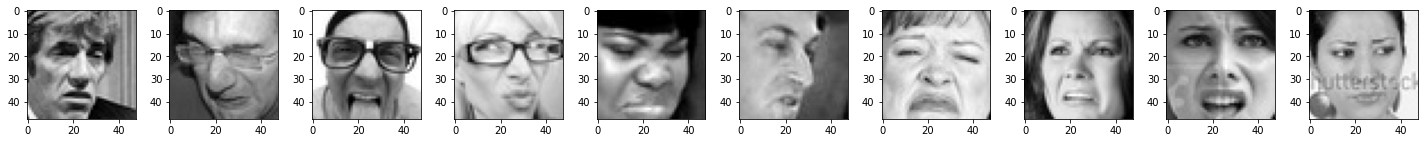

In [ ]:
plot_images(train_dir+'/disgust')

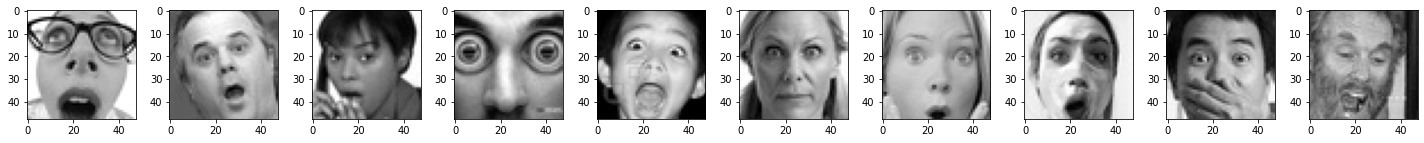

In [ ]:
plot_images(train_dir+'/surprise')

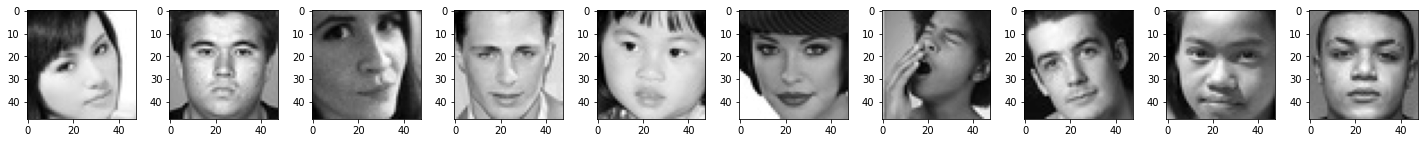

In [ ]:
plot_images(train_dir+'/neutral')

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
#Rescale 1./255 is to transform every pixel value from range [0,255] -> [0,1]. 
#And the benefits are: Treat all images in the same manner: some images are high pixel range, some 
#are low pixel range. ... Scaling every images to the same range [0,1] will make images contributes 
#more evenly to the total loss.



#flow_from_directory Method is useful when the images are sorted and placed in there respective 
#class/label folders. This method will identify classes automatically from the folder name.
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48), #The target_size is the size of your input images, every image will be resized to this size
        batch_size=64,     #Batch size is a term used in machine learning and refers to the number of training examples 
    #utilized in one iteration. ... Usually, a number that can be divided into the total dataset size. stochastic mode: 
    #where the batch size is equal to one.
        color_mode="grayscale",  #The color mode or image mode determines how colors combine based on 
    #the number of channels in a color model.
        class_mode='categorical') #2D numpy array of one-hot encoded labels. 

 validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')       


In [ ]:
#sequential classifier
emotion_model = Sequential() 

# we specify three Conv2D layers in sequential order, 
#with 3×3 kernel sizes, ReLU activation and 32, 64 and 128 filters, respectively
# give it input shape
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling is then used to reduce the spatial dimensions of the output volume.
emotion_model.add(Dropout(0.25)) #dropout rate is 0.25
#Dropout is a technique where randomly selected neurons are ignored during training

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25)) #Drop out rate

emotion_model.add(Flatten()) #flatten() function return a copy of the array collapsed into one dimension.
#First fully connected layer
emotion_model.add(Dense(1024, activation='relu')) #Dense layer
emotion_model.add(Dropout(0.5)) #fully connected layer drop out
emotion_model.add(Dense(7, activation='softmax')) # we use softmax activation in the last dense

In [ ]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

# Compile The Model

In [ ]:
#Adam is the best among the adaptive optimizers in most of the cases
# lr is learning rate is 0.0001
# decay float>0: Learning rate decay over each update.
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Train The Model

In [ ]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VAL   = validation_generator.n//validation_generator.batch_size

In [ ]:
#FittinG The Model
# An epoch means training the neural network with all the
# training data for one cycle. Here I use 50 epochs
emotion_model_info = emotion_model.fit_generator(
        train_generator,   # train generator
        steps_per_epoch=STEP_SIZE_TRAIN , # steps for epoch
        epochs=50,                       
        validation_data=validation_generator,
        validation_steps=STEP_SIZE_VAL    #validation steps
        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/50
448/448 [==============================] - 6961s 16s/step - loss: 1.8044 - accuracy: 0.2569 - val_loss: 1.7192 - val_accuracy: 0.3366
Epoch 2/50
448/448 [==============================] - 455s 1s/step - loss: 1.6332 - accuracy: 0.3646 - val_loss: 1.5460 - val_accuracy: 0.4148
Epoch 3/50
448/448 [==============================] - 453s 1s/step - loss: 1.5424 - accuracy: 0.4083 - val_loss: 1.4781 - val_accuracy: 0.4393
Epoch 4/50
448/448 [==============================] - 454s 1s/step - loss: 1.4696 - accuracy: 0.4400 - val_loss: 1.4060 - val_accuracy: 0.4643
Epoch 5/50
448/448 [==============================] - 455s 1s/step - loss: 1.4060 - accuracy: 0.4658 - val_loss: 1.3538 - val_accuracy: 0.4891
Epoch 6/50
448/448 [==============================] - 451s 1s/step - loss: 1.3559 - accuracy: 0.4828 - val_loss: 1.3104 - val_accuracy: 0.4975
Epoch 7/50
448/448 [==============================] - 446s 996ms/step - loss: 1.3128 - accuracy: 0.5025 - val_loss: 1.2799 - val_accuracy: 0

# SavinG The Model

In [ ]:
#Saving the model
emotion_model.save('model.h5')


In [ ]:
#Load the model
from keras.models import load_model
emotion_model = load_model('/model.h5')

# Plotting Accuracy & Loss

In [8]:
def emotion_analysis(emotions):  #defining emotion analysus
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects) #labeling x axis as emotions
    plt.ylabel('percentage')  #labeling y axis
    plt.title('emotion')    #plot title
    
    plt.show() #showing plot

In [9]:
!pip install fer

[{'box': (425, 2182, 73, 73), 'emotions': {'angry': 0.34, 'disgust': 0.08, 'fear': 0.11, 'happy': 0.32, 'sad': 0.06, 'surprise': 0.01, 'neutral': 0.08}}]


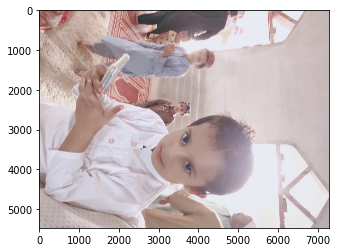

In [11]:
from fer import FER
import matplotlib.pyplot as plt 
%matplotlib inline

test_image_one = plt.imread("/content/sample_data/IMG_20210721_093358.jpg")
emo_detector = FER(mtcnn=True)
# Capture all the emotions on the image
captured_emotions = emo_detector.detect_emotions(test_image_one)
# Print all captured emotions with the image
print(captured_emotions)
plt.imshow(test_image_one)
plt.show()

# AccesinG The google colab to webcam

In [ ]:
#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript # imorting display and javasript from ipython.display
from google.colab.output import eval_js #Evaluates the Javascript expression within the context of the outputframe of the current cell
from base64 import b64decode #Decode the Base64 encoded bytes-like object or ASCII string s and return the decoded bytes .

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Capture photo use webcam

In [ ]:
take_photo() #taking photo

<IPython.core.display.Javascript object>

'photo.jpg'

# Show the taken image and Emotions accuracy according to expressions

OpenCV(4.1.2) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'



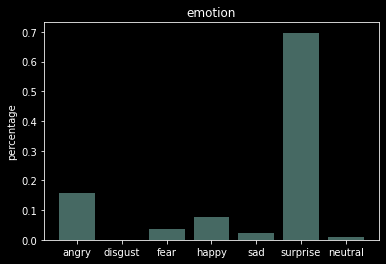

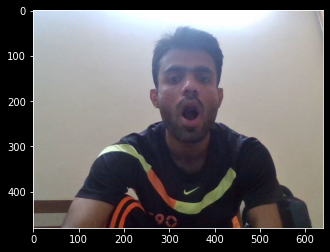

In [ ]:
import cv2
            
def facecrop(image):  
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('/content/photo.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

   


if __name__ == '__main__':
    facecrop('/content/photo.jpg')

#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()

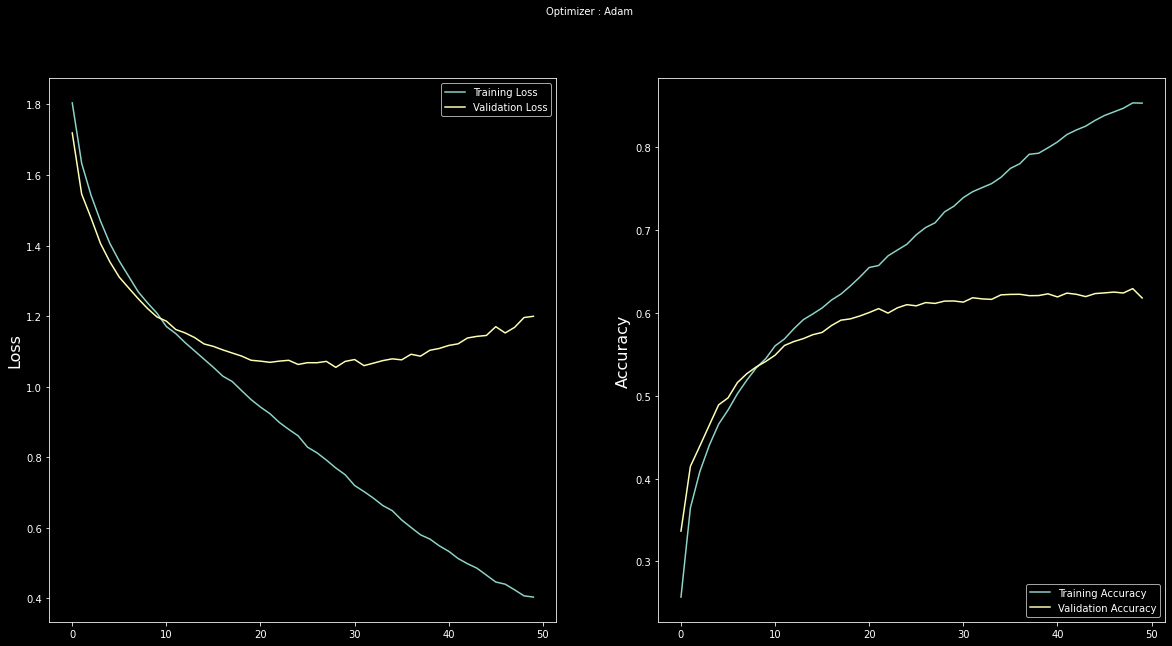

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(emotion_model_info.history['loss'], label='Training Loss')
plt.plot(emotion_model_info.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion_model_info.history['accuracy'], label='Training Accuracy')
plt.plot(emotion_model_info.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()